In [12]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [13]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/Users/sagyanniraula/AI/masked_dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical",

)

Found 15531 images belonging to 7 classes.


In [15]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  ...
  [0.5157952  0.5157952  0.5157952 ]
  [0.50980395 0.50980395 0.50980395]
  [0.50980395 0.50980395 0.50980395]]

 [[0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]
  ...
  [0.51384467 0.51384467 0.51384467]
  [0.50980395 0.50980395 0.50980395]
  [0.50980395 0.50980395 0.50980395]]

 [[0.9948802  0.9948802  0.9948802 ]
  [0.9952704  0.9952704  0.9952704 ]
  [0.9956605  0.9956605  0.9956605 ]
  ...
  [0.51189417 0.51189417 0.51189417]
  [0.50980395 0.50980395 0.50980395]
  [0.50980395 0.50980395 0.50980395]]

 ...

 [[0.9333334  0.9490197  0.95294124]
  [0.9333334  0.9490197  0.95294124]
  [0.9312432  0.9456754  0.95001495]
  ...
  [0.7582564  0.74732774 0.7285559 ]
  [0.7851732  0.7750247  0.75703317]
  [0.81209    0.80272174 0.78551036]]

 [[0.9333334  0.9490197  0.95294124]
  [0.9333334  0.9490197  0.95294124]


In [16]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [18]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/Users/sagyanniraula/AI/masked_dataset/validation',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical"
)

Found 4953 images belonging to 7 classes.


In [19]:
n_classes = 7

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Changed to softmax for categorical classification
])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,975 (1.33 MB)

 Trainable params: 347,975 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [22]:
history=model.fit(
    train_generator,
    batch_size =32,
    validation_data=validation_generator,
      verbose=1,
    epochs=50,
)

Epoch 1/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 312s 639ms/step - accuracy: 0.1744 - loss: 1.8636 - val_accuracy: 0.2098 - val_loss: 1.7991
Epoch 2/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 310s 638ms/step - accuracy: 0.2771 - loss: 1.7456 - val_accuracy: 0.3024 - val_loss: 1.7220
Epoch 3/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 310s 638ms/step - accuracy: 0.3325 - loss: 1.6522 - val_accuracy: 0.3469 - val_loss: 1.6058
Epoch 4/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 319s 657ms/step - accuracy: 0.3759 - loss: 1.5890 - val_accuracy: 0.3786 - val_loss: 1.5766
Epoch 5/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 311s 639ms/step - accuracy: 0.3958 - loss: 1.5446 - val_accuracy: 0.4028 - val_loss: 1.5278
Epoch 6/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 312s 641ms/step - accuracy: 0.4132 - loss: 1.5015 - val_accuracy: 0.4266 - val_loss: 1.4931
Epoch 7/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 316s 650ms/step - accuracy: 0.4269 - loss: 1.4706 - val_accuracy: 0.4034 - val_loss: 1.5081
Epoch 8/50
486/486 ━━━━━━━━━━━━━━━━━━━━ 311s 640ms/step - accuracy: 0.4419 -

In [25]:
scores = model.evaluate(train_generator)

486/486 ━━━━━━━━━━━━━━━━━━━━ 114s 235ms/step - accuracy: 0.6814 - loss: 0.8574


In [26]:
scores

[0.8683565855026245, 0.6752302050590515]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 486}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
type(history.history['loss'])

list

In [31]:
len(history.history['loss'])

50

In [32]:
history.history['loss'][:10]

[1.840800166130066,
 1.7107516527175903,
 1.633443832397461,
 1.5841705799102783,
 1.538507342338562,
 1.5019961595535278,
 1.470041275024414,
 1.4473071098327637,
 1.4191855192184448,
 1.4003671407699585]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
val_acc

[0.20977185666561127,
 0.3024429678916931,
 0.34686049818992615,
 0.3785584568977356,
 0.4027861952781677,
 0.42661014199256897,
 0.40339189767837524,
 0.42499494552612305,
 0.4498283863067627,
 0.41853421926498413,
 0.37391480803489685,
 0.4502321779727936,
 0.4558853209018707,
 0.46093276143074036,
 0.4399353861808777,
 0.44760751724243164,
 0.4673934876918793,
 0.471027672290802,
 0.4498283863067627,
 0.4730466306209564,
 0.4581061899662018,
 0.47163334488868713,
 0.47567132115364075,
 0.4891984760761261,
 0.4429638683795929,
 0.4354936480522156,
 0.4459923207759857,
 0.451241672039032,
 0.4696143865585327,
 0.467191606760025,
 0.4744599163532257,
 0.4651726186275482,
 0.4480113089084625,
 0.47950735688209534,
 0.44579043984413147,
 0.46133655309677124,
 0.4799111783504486,
 0.4665859043598175,
 0.4782959818840027,
 0.47910356521606445,
 0.461134672164917,
 0.46779730916023254,
 0.47910356521606445,
 0.4607308804988861,
 0.46133655309677124,
 0.471027672290802,
 0.4730466306209564,


In [35]:
acc

[0.1961238831281662,
 0.29837098717689514,
 0.3458244800567627,
 0.3760865330696106,
 0.3986221253871918,
 0.4147833287715912,
 0.42991435527801514,
 0.4395080804824829,
 0.45309382677078247,
 0.4662288427352905,
 0.4741484820842743,
 0.48206812143325806,
 0.4910179674625397,
 0.49404415488243103,
 0.5034447312355042,
 0.5067928433418274,
 0.5197347402572632,
 0.5231472253799438,
 0.5289421081542969,
 0.538407027721405,
 0.5360247492790222,
 0.5477432012557983,
 0.5507050156593323,
 0.5603631734848022,
 0.5676389336585999,
 0.5646771192550659,
 0.5700212717056274,
 0.5789067149162292,
 0.5839289426803589,
 0.5894018411636353,
 0.5879209041595459,
 0.5969995260238647,
 0.6030519604682922,
 0.6033095121383667,
 0.6086536645889282,
 0.6132895350456238,
 0.6170240044593811,
 0.6221106052398682,
 0.6270040273666382,
 0.6309316754341125,
 0.634344220161438,
 0.6412980556488037,
 0.6461271047592163,
 0.641684353351593,
 0.6447106003761292,
 0.6487669944763184,
 0.6524370908737183,
 0.65797436

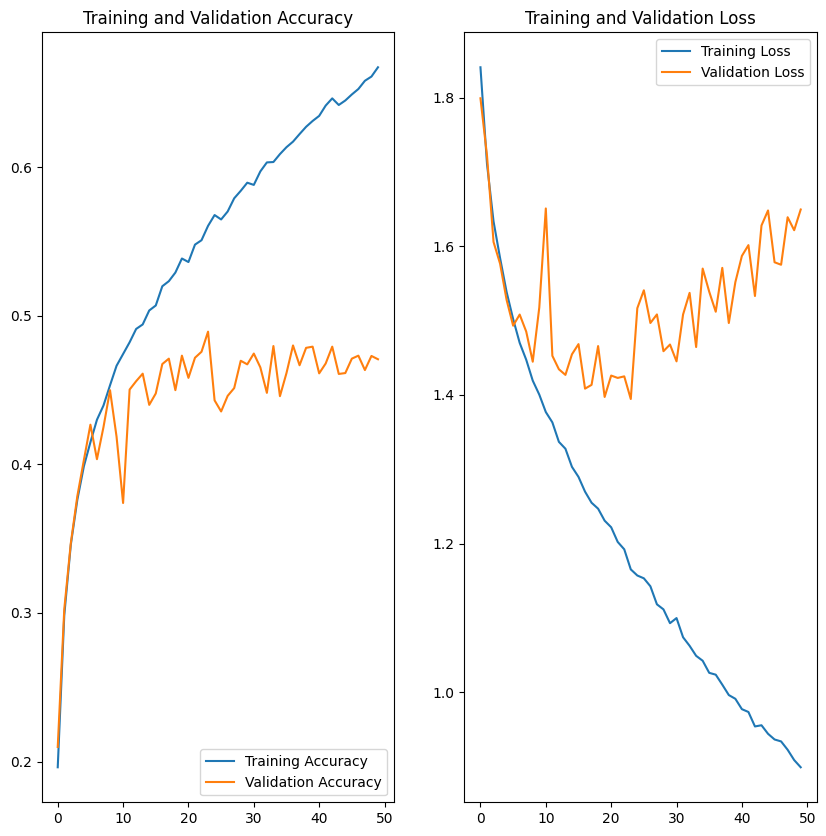

In [36]:


EPOCHS = 50

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict:


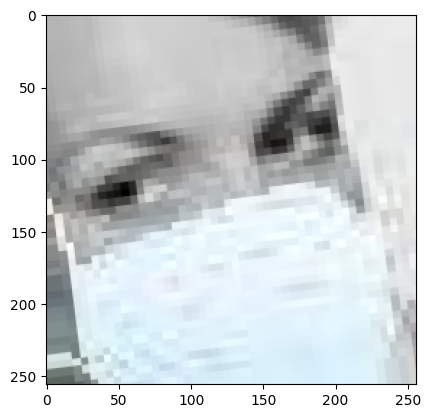

Actual label: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Predicted label: fear


In [38]:

import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in train_generator:
    first_image = image_batch[0]
    first_label_index = np.argmax(label_batch[0])  # Get the index of the first label
    first_label = class_names[first_label_index]  # Convert the index to the original label

    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()  # Added to display the image
    print("Actual label:", first_label)
    
    batch_prediction = model.predict(image_batch)
    predicted_label_index = np.argmax(batch_prediction[0])  # Get the index of the predicted label
    predicted_label = class_names[predicted_label_index]  # Convert the index to the original label
    print("Predicted label:", predicted_label)
    
    break


In [39]:
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class_index = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class_index, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


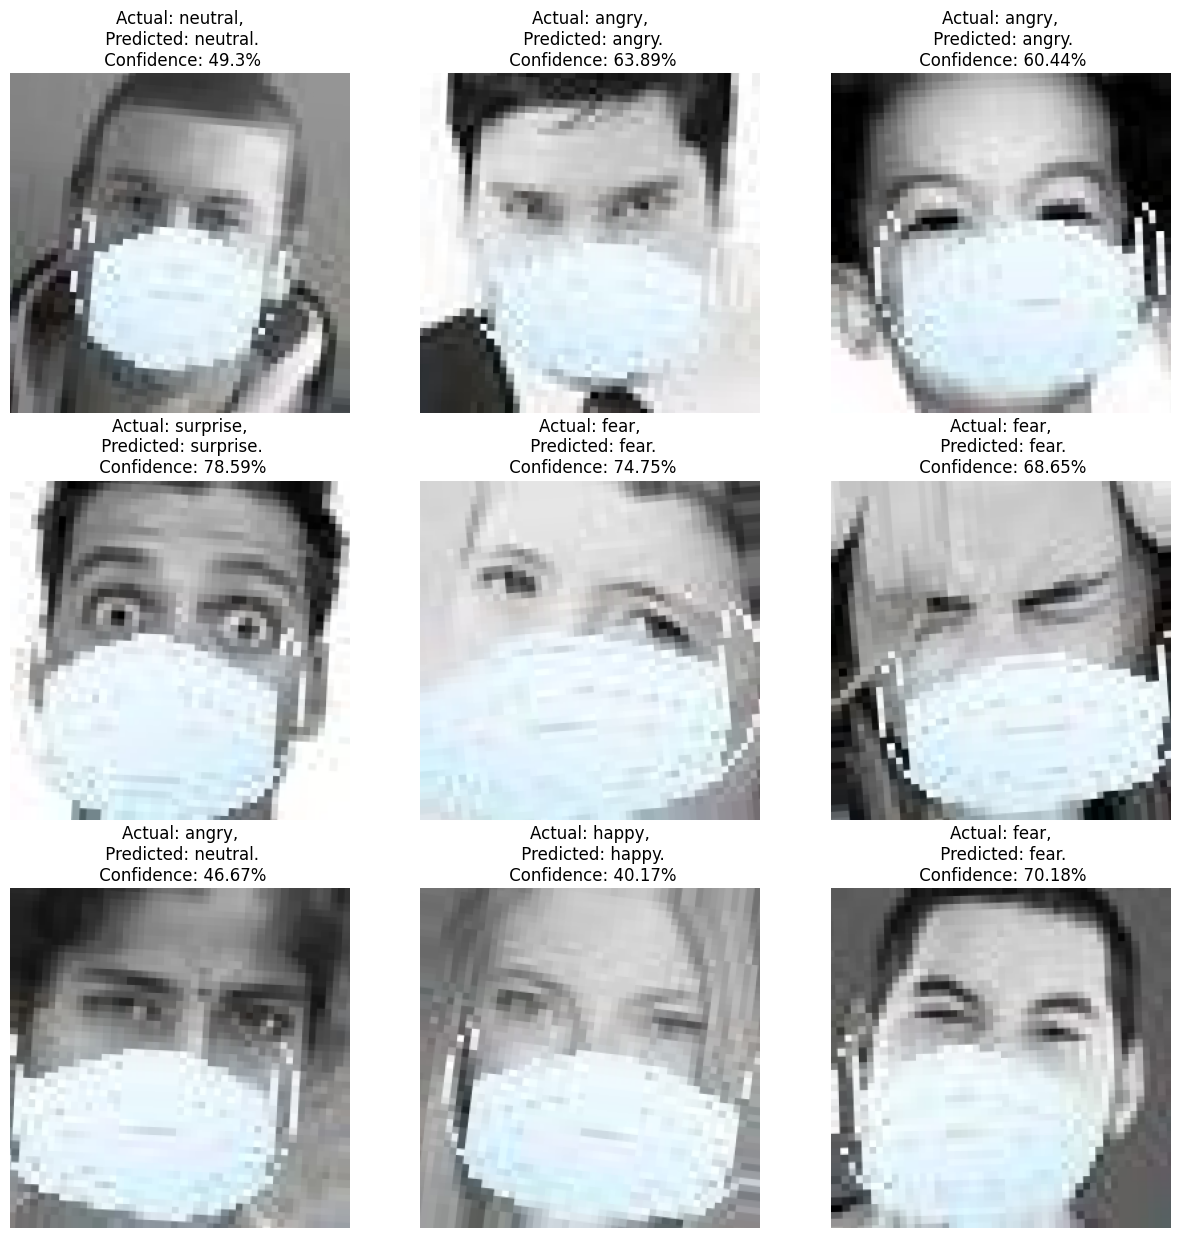

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class_index, confidence = predict(model, images[i], class_names)
        predicted_class = class_names[predicted_class_index]
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    
    break  # Exit the loop after the first batch
    
plt.show()



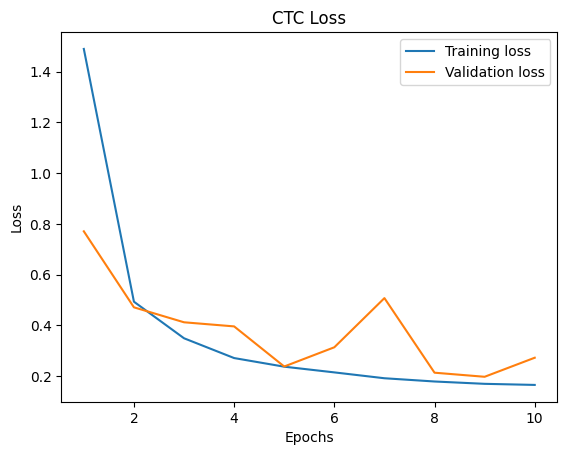

In [42]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Assuming 10 epochs
train_losses = [1.4896, 0.4932, 0.3490, 0.2710, 0.2370, 0.2145, 0.1914, 0.1786, 0.1694, 0.1651]
val_losses = [0.7706, 0.4710, 0.4120, 0.3958, 0.2377, 0.3135, 0.5073, 0.2133, 0.1972, 0.2723]

plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.title('CTC Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [43]:
model.save('mask_model.h5')